/var/folders/_x/j976w76s3d57ycwxdqspwd9m0000gn/T/ipykernel_8281/2913577065.py:8: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True, errors='coerce')


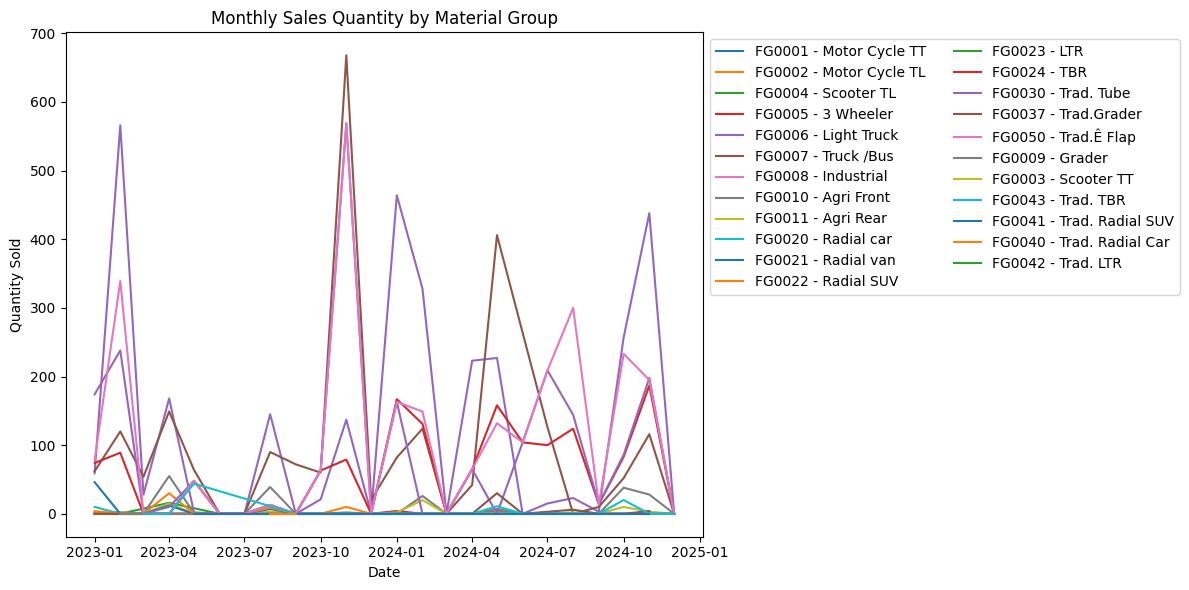

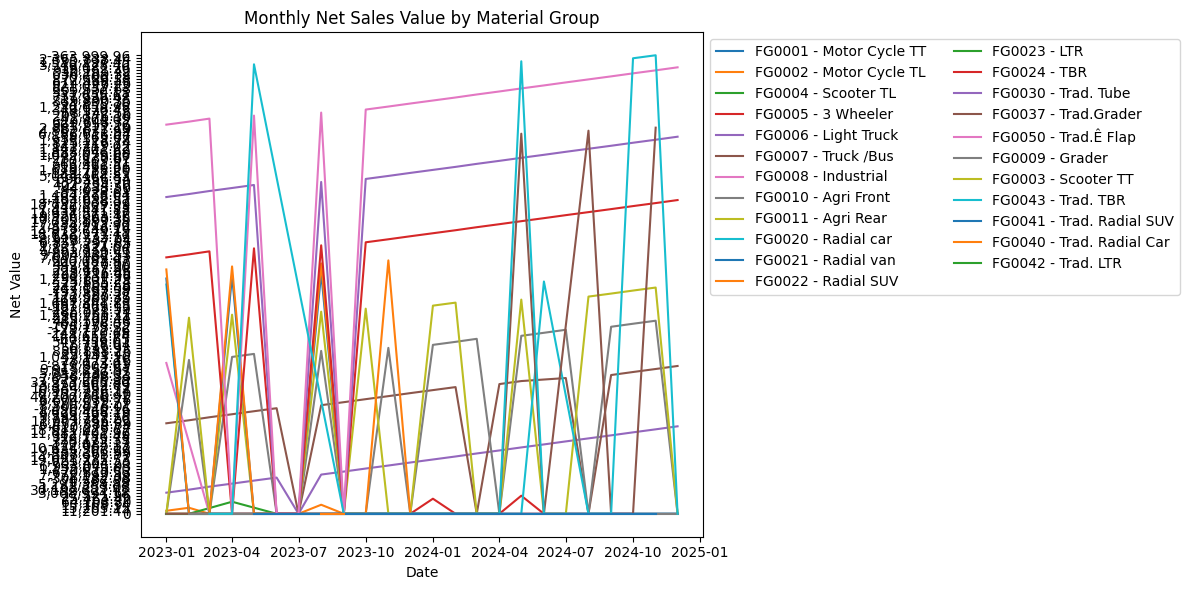

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/Users/jaygamage/Downloads/salesdata2324.csv", encoding='latin1')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True, errors='coerce')

# Drop rows with invalid dates
df.dropna(subset=['Date'], inplace=True)

# Extract Year, Month, and Quarter
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter

# Fill missing values with 0
df.fillna(0, inplace=True)

# Set negative 'Quantity' to 0 (assuming sales cannot be negative)
df['Quantity'] = df['Quantity'].apply(lambda x: max(x, 0))

# Grouping by date and material group for total monthly sales
monthly_sales = df.groupby(['Year', 'Month', 'Material Group']).agg({'Quantity': 'sum', 'Net Value': 'sum'}).reset_index()

# Create a 'Month-Year' column for plotting
monthly_sales['Month-Year'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(DAY=1))

# Set 'Month-Year' as the index
monthly_sales.set_index('Month-Year', inplace=True)

# Plot 1: Sales Quantity Trend by Material Group
plt.figure(figsize=(12, 6))
for material_group in monthly_sales['Material Group'].unique():
    subset = monthly_sales[monthly_sales['Material Group'] == material_group]
    plt.plot(subset.index, subset['Quantity'], label=material_group)

plt.title('Monthly Sales Quantity by Material Group')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2)
plt.tight_layout()
plt.show()

# Plot 2: Net Sales Value Trend by Material Group
plt.figure(figsize=(12, 6))
for material_group in monthly_sales['Material Group'].unique():
    subset = monthly_sales[monthly_sales['Material Group'] == material_group]
    plt.plot(subset.index, subset['Net Value'], label=material_group)

plt.title('Monthly Net Sales Value by Material Group')
plt.xlabel('Date')
plt.ylabel('Net Value')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2)
plt.tight_layout()
plt.show()

/var/folders/_x/j976w76s3d57ycwxdqspwd9m0000gn/T/ipykernel_8281/1894588903.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales_series = monthly_sales['Quantity'].resample('M').sum()
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Mean Absolute Error (MAE): 517.83


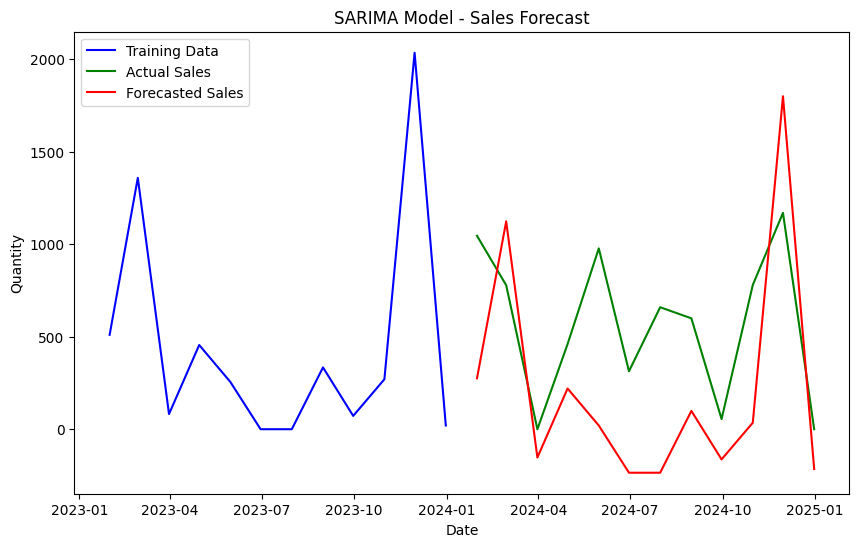

In [5]:
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error

# Grouping by month and summing quantities
monthly_sales_series = monthly_sales['Quantity'].resample('M').sum()

# Train-test split
train_data = monthly_sales_series[:-12]  # Train on all data except last 12 months
test_data = monthly_sales_series[-12:]   # Test on last 12 months

# SARIMA Model (Seasonal ARIMA)
sarima_model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit(disp=False)

# Forecasting
forecast = sarima_fit.forecast(steps=12)
forecast.index = test_data.index

# Evaluation
mae = mean_absolute_error(test_data, forecast)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Plot Actual vs Forecast
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Training Data', color='blue')
plt.plot(test_data, label='Actual Sales', color='green')
plt.plot(forecast, label='Forecasted Sales', color='red')
plt.title('SARIMA Model - Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters exc

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.17364D+00    |proj g|=  1.15534D+00

At iterate    5    f=  3.45218D+00    |proj g|=  9.78431D-03

At iterate   10    f=  3.45071D+00    |proj g|=  1.71799D-03

At iterate   15    f=  3.45068D+00    |proj g|=  2.71601D-04

At iterate   20    f=  3.44986D+00    |proj g|=  1.33015D-02

At iterate   25    f=  3.42060D+00    |proj g|=  9.99437D-02

At iterate   30    f=  3.39614D+00    |proj g|=  6.95236D-03

At iterate   35    f=  3.39137D+00    |proj g|=  1.12109D-02

At iterate   40    f=  3.38938D+00    |proj g|=  3.99727D-03

At iterate   45    f=  3.38846D+00    |proj g|=  2.75118D-03

At iterate   50    f=  3.38808D+00    |proj g|=  2.57479D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/_x/j976w76s3d57ycwxdqspwd9m0000gn/T/ipykernel_8281/3872884519.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=monthly_sales_total.index[-1], periods=12*3+1, freq='M')[1:]


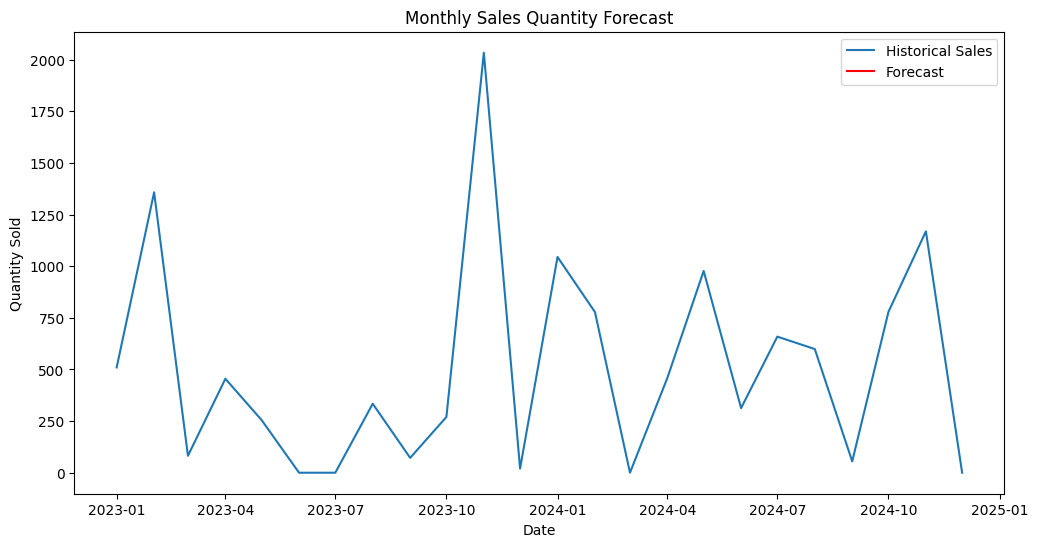

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming 'monthly_sales' DataFrame is already created and 'Month-Year' is set as index

# Aggregate data to get total monthly sales
monthly_sales_total = monthly_sales.groupby('Month-Year').agg({'Quantity': 'sum', 'Net Value': 'sum'})

# Fit ARIMA model
model = SARIMAX(monthly_sales_total['Quantity'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Forecast for 2025
forecast = results.get_forecast(steps=12*3)  # 3 years ahead (2023, 2024, 2025)
forecast_index = pd.date_range(start=monthly_sales_total.index[-1], periods=12*3+1, freq='M')[1:]
forecast_df = pd.DataFrame(forecast.predicted_mean, index=forecast_index, columns=['Forecast'])

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_total.index, monthly_sales_total['Quantity'], label='Historical Sales')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='red')
plt.title('Monthly Sales Quantity Forecast')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.legend()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters exc

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.17364D+00    |proj g|=  1.15534D+00

At iterate    5    f=  3.45218D+00    |proj g|=  9.78431D-03

At iterate   10    f=  3.45071D+00    |proj g|=  1.71799D-03

At iterate   15    f=  3.45068D+00    |proj g|=  2.71601D-04

At iterate   20    f=  3.44986D+00    |proj g|=  1.33015D-02

At iterate   25    f=  3.42060D+00    |proj g|=  9.99437D-02

At iterate   30    f=  3.39614D+00    |proj g|=  6.95236D-03

At iterate   35    f=  3.39137D+00    |proj g|=  1.12109D-02

At iterate   40    f=  3.38938D+00    |proj g|=  3.99727D-03

At iterate   45    f=  3.38846D+00    |proj g|=  2.75118D-03


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/_x/j976w76s3d57ycwxdqspwd9m0000gn/T/ipykernel_8281/2136320991.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=monthly_sales_total.index[-1], periods=forecast_steps+1, freq='M')[1:]



At iterate   50    f=  3.38808D+00    |proj g|=  2.57479D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     60      1     0     0   2.575D-03   3.388D+00
  F =   3.3880795816127804     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


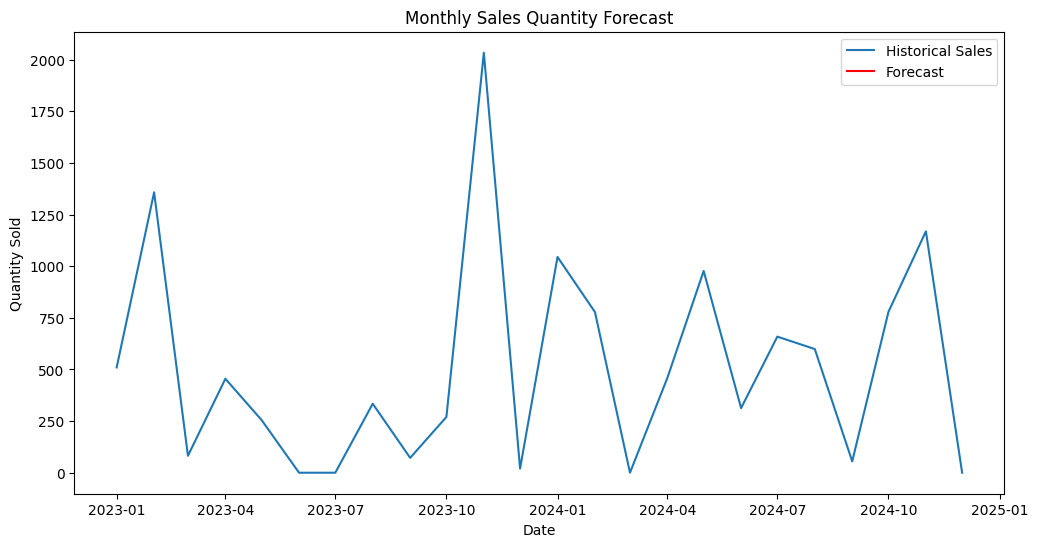

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming 'monthly_sales' DataFrame is already created and 'Month-Year' is set as index

# Aggregate data to get total monthly sales
monthly_sales_total = monthly_sales.groupby('Month-Year').agg({'Quantity': 'sum', 'Net Value': 'sum'})

# Fit SARIMA model
model = SARIMAX(monthly_sales_total['Quantity'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Forecast until the end of 2026
forecast_steps = (2026 - monthly_sales_total.index[-1].year) * 12 + (12 - monthly_sales_total.index[-1].month)
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=monthly_sales_total.index[-1], periods=forecast_steps+1, freq='M')[1:]
forecast_df = pd.DataFrame(forecast.predicted_mean, index=forecast_index, columns=['Forecast'])

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_total.index, monthly_sales_total['Quantity'], label='Historical Sales')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='red')
plt.title('Monthly Sales Quantity Forecast')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.legend()
plt.show()